In [ ]:
## Google Play Store Apps - Analysis and Visualisation.

In [1]:
#Installing required packages
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install seaborn

In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv("googleplaystore_v2.csv")

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

### Fixing all the null Values.
#### Rating,    Type,   Content_Rating,    Current_Version    &    Android_Version.

#### 1.Rating

In [9]:
df[df.Rating.isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7000.0,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,07-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5700.0,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3700.0,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7400.0,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2900.0,"10,000+",Free,0,Mature 17+,Beauty,08-Aug-17,2,2.3 and up


In [10]:
df = df[~df.Rating.isnull()]

In [11]:
df[df.Rating.isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


#### 2.Content_Rating

In [13]:
df[df.Content_Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [14]:
df = df[~df.Content_Rating.isnull()]

In [15]:
df[df.Content_Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


#### 3.Current_ver

In [17]:
df[df["Current_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,06-Jun-18,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up


In [18]:
df["Current_Ver"].value_counts()

Current_Ver
Varies with device    1415
1                      476
1.1                    206
1.2                    133
2                      129
                      ... 
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
5.9.7                    1
0.3.4                    1
Name: count, Length: 2594, dtype: int64

In [19]:
df["Current_Ver"].mode()[0]

'Varies with device'

In [20]:
df["Current_Ver"] = df["Current_Ver"].fillna(df["Current_Ver"].mode()[0])

In [21]:
df["Current_Ver"].isnull().sum()

0

#### 4.Android_Ver

In [23]:
df[df["Android_Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


In [24]:
df["Android_Ver"].value_counts()

Android_Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [25]:
df["Android_Ver"].mode()[0]

'4.1 and up'

In [26]:
df["Android_Ver"] = df["Android_Ver"].fillna(df["Android_Ver"].mode()[0])

In [27]:
df["Android_Ver"].isnull().sum()

0

In [28]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [29]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

### Converting some objects types to floating type (Reviews, Installs & Price).

#### Reviews

In [32]:
df.Reviews = df.Reviews.astype("int32")

#### Installs

In [34]:
df.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [35]:
df.Installs = df["Installs"].str.replace(",", "").str.replace("+", "").astype("int")

In [36]:
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

#### Price

In [38]:
df["Price"].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [39]:
df.Price = df.Price.apply(lambda x : 0 if x=="0"  else float(x[1:]))

In [40]:
df.Price.dtype

dtype('float64')

In [41]:
df.Price.value_counts()

Price
0.00      8719
2.99       114
0.99       107
4.99        70
1.99        59
          ... 
1.29         1
299.99       1
379.99       1
37.99        1
1.20         1
Name: count, Length: 73, dtype: int64

In [42]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [43]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 951.2+ KB


### Sanity Checks

#### The reviews should be less than the no of installs.

In [47]:
df[df.Reviews > df.Installs].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,02-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,08-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up


In [48]:
df = df[df.Reviews <= df.Installs]

In [49]:
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


### Plotting the processed data.

#### Matplotlib

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

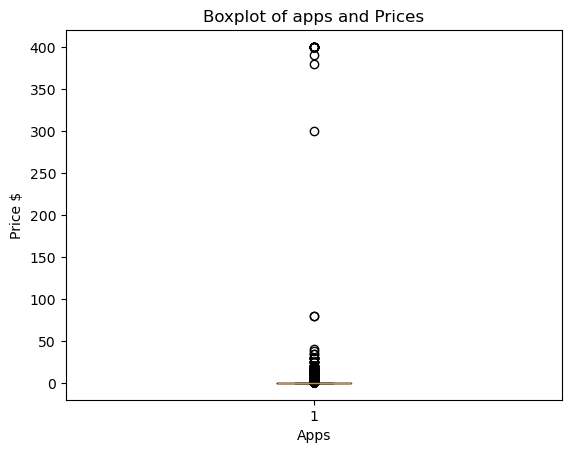

In [53]:
plt.boxplot(df.Price)
plt.title("Boxplot of apps and Prices")
plt.xlabel("Apps")
plt.ylabel("Price $")
plt.show()

In [54]:
# Mostly apps are priced  under 50, so let's remove over-priced apps.

In [55]:
df[df.Price>50]    #Checking high priced apps.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,03-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,01-Jul-18,1,4.0 and up


In [56]:
df = df[df.Price < 50]

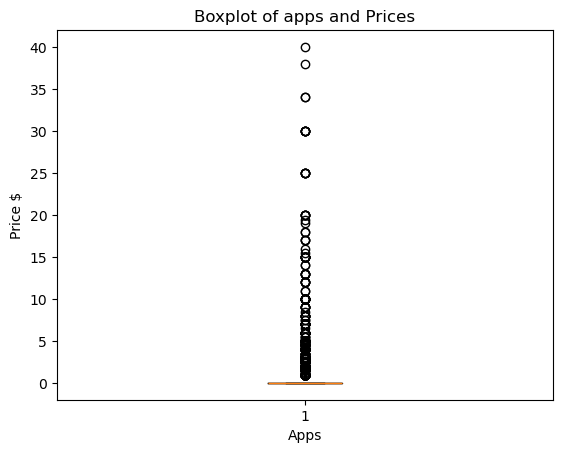

In [57]:
plt.boxplot(df.Price)
plt.title("Boxplot of apps and Prices")
plt.xlabel("Apps")
plt.ylabel("Price $")
plt.show()

In [58]:
df.Price.describe()

count    9342.00000
mean        0.31741
std         1.83051
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        39.99000
Name: Price, dtype: float64

### Histogram

**Histogram for the reviews**

<function matplotlib.pyplot.show(close=None, block=None)>

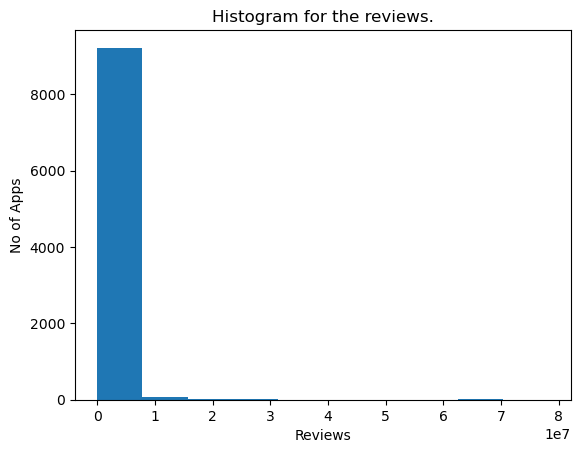

In [61]:
plt.hist(df.Reviews)
plt.title("Histogram for the reviews.")
plt.xlabel("Reviews")
plt.ylabel("No of Apps")
plt.show

In [62]:
#Note - X axis shows the vlaues in million(s), Y axis in thousands.

**Checking reviews more than 10 milliion**

In [64]:
df[df.Reviews >= 10000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.52952,1000000000,Free,0.0,Everyone,Communication,01-Aug-18,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.52952,1000000000,Free,0.0,Everyone,Communication,03-Aug-18,Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.52952,500000000,Free,0.0,Everyone,Communication,18-Jul-18,Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.00000,500000000,Free,0.0,Teen,Communication,02-Aug-18,12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.52952,1000000000,Free,0.0,Everyone,Communication,03-Aug-18,Varies with device,Varies with device


**Drop records having more than 1 million reviews**

In [66]:
df = df[df.Reviews <= 10000000]

<function matplotlib.pyplot.show(close=None, block=None)>

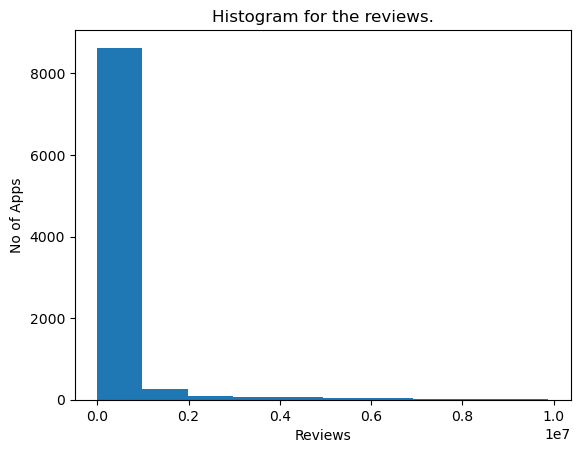

In [67]:
plt.hist(df.Reviews)
plt.title("Histogram for the reviews.")
plt.xlabel("Reviews")
plt.ylabel("No of Apps")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

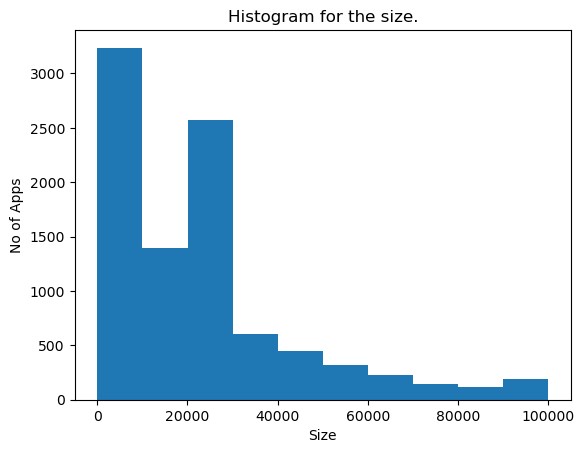

In [68]:
plt.hist(df.Size)
plt.title("Histogram for the size.")
plt.xlabel("Size")
plt.ylabel("No of Apps")
plt.show
plt.show

In [69]:
df.Size.describe()

count      9250.000000
mean      22530.565122
std       21134.167342
min           8.500000
25%        6500.000000
50%       20000.000000
75%       27000.000000
max      100000.000000
Name: Size, dtype: float64

### Data analysis to answer business questions

In [71]:
import warnings
warnings.filterwarnings("ignore")

**Distribution to the ratings**

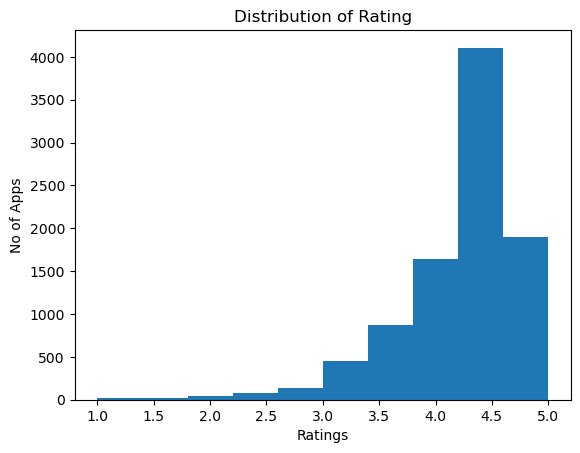

In [73]:
df.Rating.plot.hist()
plt.title("Distribution of Rating")
plt.xlabel("Ratings")
plt.ylabel("No of Apps")
plt.show()

### Seaborn

**Import Seaborn**

In [76]:
import seaborn as sns

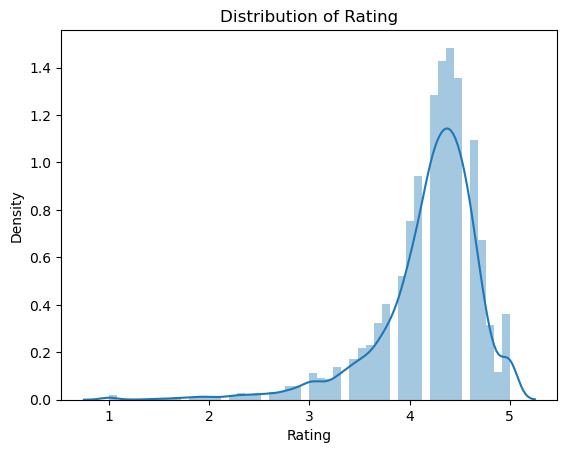

In [77]:
sns.distplot(df.Rating)
plt.title("Distribution of Rating")
plt.show()

## Changing the color, styles in Seaborn.

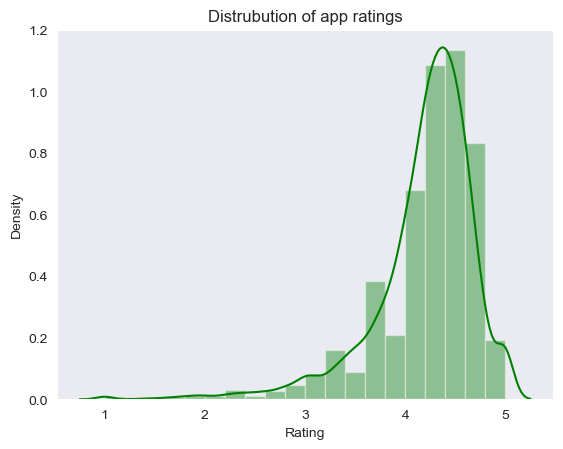

In [79]:
sns.set_style("dark")
sns.distplot(df.Rating, bins = 20, color="g")
plt.title("Distrubution of app ratings", fontsize = 12)
plt.show()

In [80]:
#To see more available styles in matplotlib.

In [81]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

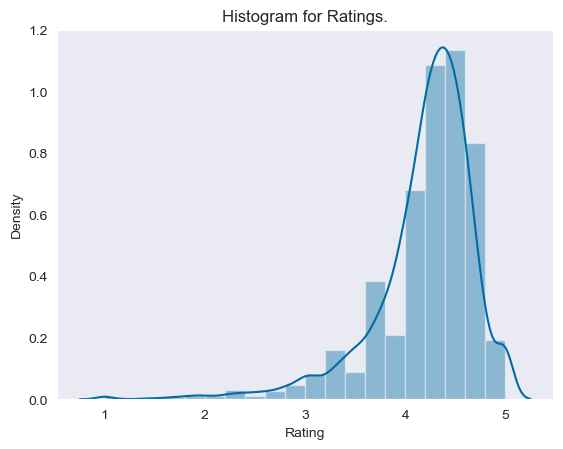

In [82]:
plt.style.use("tableau-colorblind10")
sns.distplot(df.Rating, bins = 20)
plt.title("Histogram for Ratings.")
plt.show()

In [83]:
#More styles to use.

In [84]:
#plt.style.use("ggplot")

In [85]:
#sns.distplot(df.Rating, bins = 20)
#plt.show()

In [86]:
#plt.style.use("dark_background")

In [87]:
#sns.distplot(df.Rating, bins = 20)
#plt.show()

### Pie chart and Bar chart

#### Content Rating

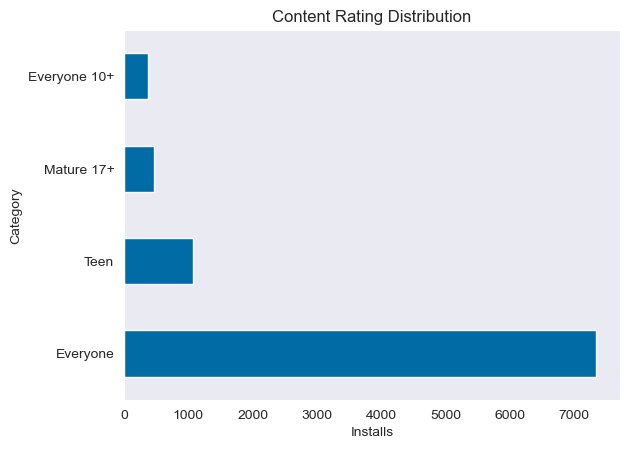

In [180]:
df["Content_Rating"].value_counts().plot.barh()
plt.title("Content Rating Distribution")
plt.xlabel("Installs")
plt.ylabel("Category")
plt.show()

In [91]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           7344
Teen               1067
Mature 17+          458
Everyone 10+        377
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [92]:
#Dropping records for 18+ and unrated category.

In [93]:
df = df[~df["Content_Rating"].isin(["Adults only 18+", "Unrated"])]

In [94]:
df["Content_Rating"].value_counts()

Content_Rating
Everyone        7344
Teen            1067
Mature 17+       458
Everyone 10+     377
Name: count, dtype: int64

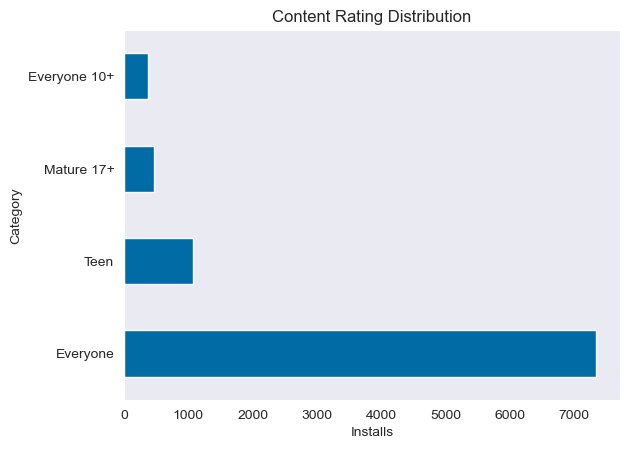

In [178]:
df["Content_Rating"].value_counts().plot.barh()
plt.title("Content Rating Distribution")
plt.xlabel("Installs")
plt.ylabel("Category")
plt.show()

### Android_Ver

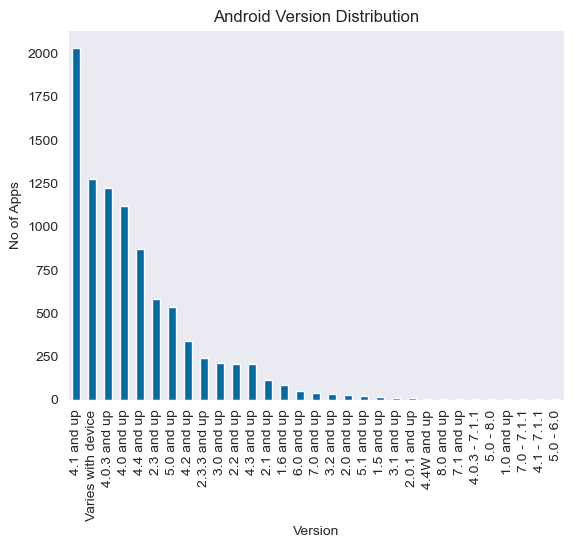

In [176]:
df["Android_Ver"].value_counts().plot.bar()
plt.title("Android Version Distribution")
plt.xlabel("Version")
plt.ylabel("No of Apps")
plt.show()

In [ ]:
# scatter plot size vs rating

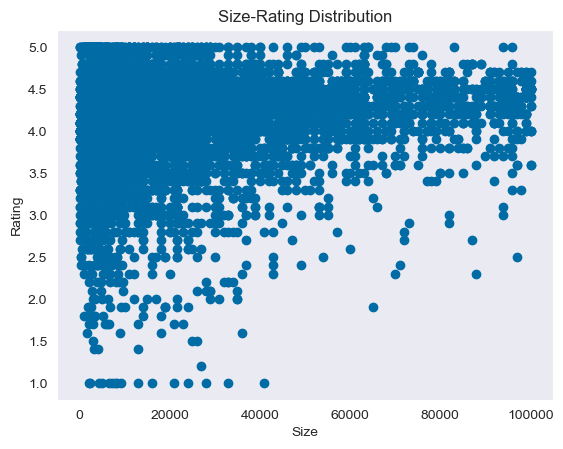

In [184]:
plt.scatter(df.Size, df.Rating)
plt.title("Size-Rating Distribution")
plt.xlabel("Size")
plt.ylabel("Rating")
plt.show()

#### Jointplot

In [191]:
#sns.jointplot()

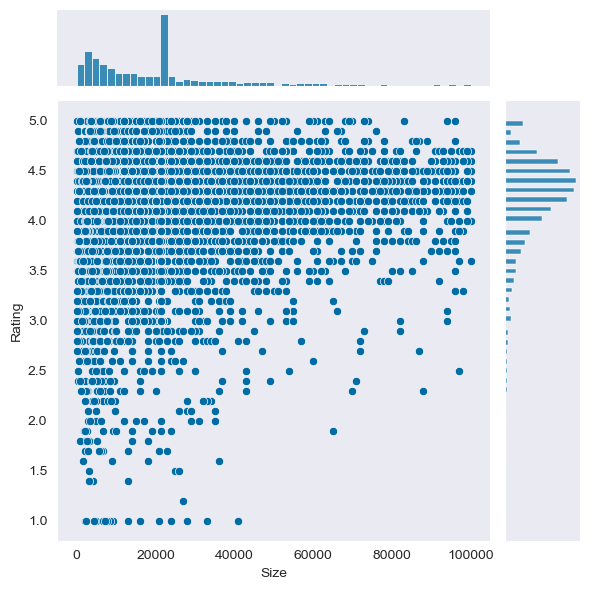

In [201]:
sns.jointplot(x="Size", y="Rating", data=df)
plt.show()

### Regplots

In [197]:
# Ratings vs Size

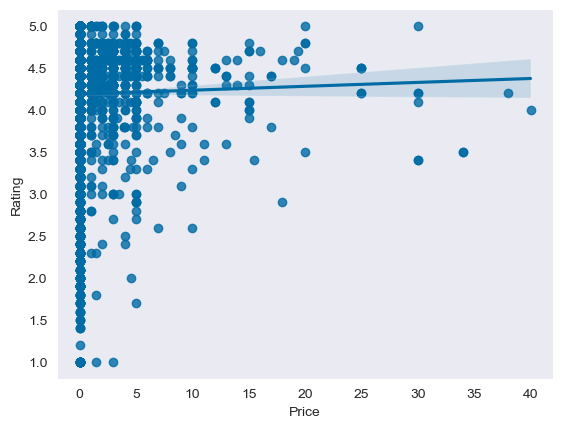

In [203]:
sns.regplot(x="Price", y='Rating', data=df)
plt.show()

#### Jointplot & Regplot

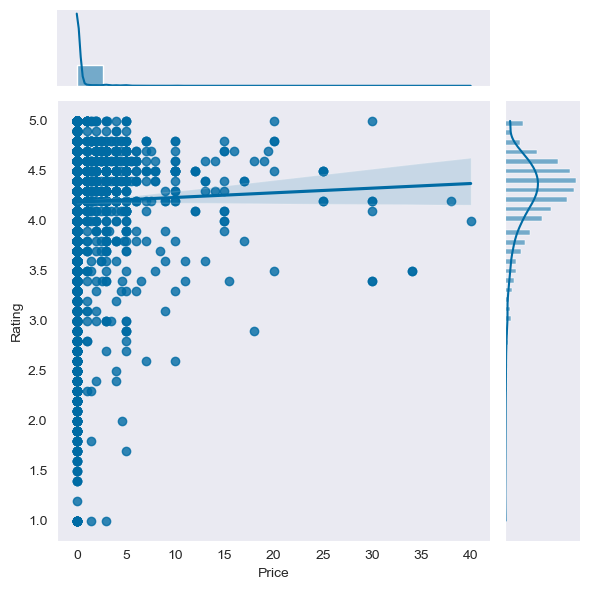

In [208]:
sns.jointplot(x="Price", y="Rating", data=df, kind="reg")
plt.show()

### Pair Plots

In [214]:
# Looking at all numeric columns all together

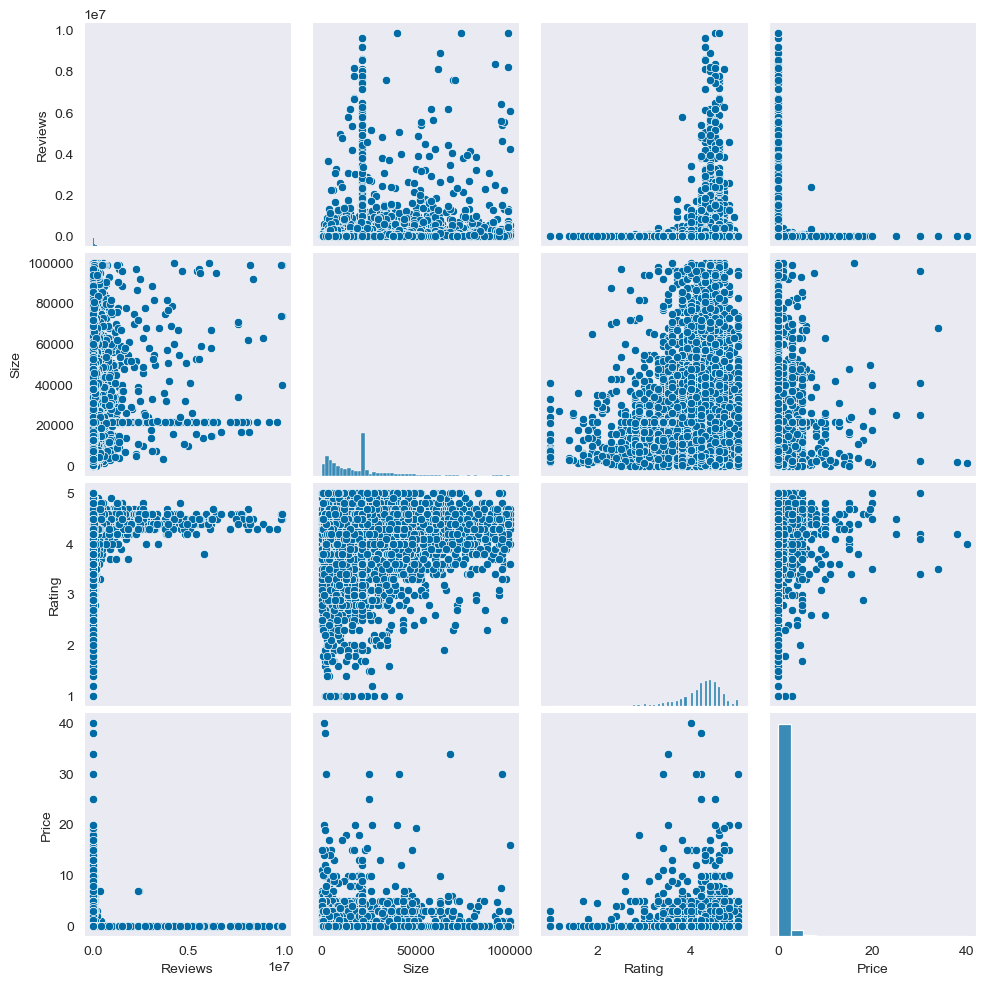

In [223]:
sns.pairplot(df[["Reviews", "Size", "Rating", "Price"]])
plt.show()